In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

In [3]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('/content/drive/MyDrive/My_Projects/Movies remondation based system/netflix_data.csv')

In [29]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [20]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
data.shape

(8807, 12)

In [23]:
movie_type_counts = data['type'].value_counts()

# Create the pie chart
fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the plot area
    font_color='white',  # White font color
    title='Distribution of movies and tv shows',  # Chart title
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

In [24]:
movie_counts = data['release_year'].value_counts().sort_index()
# Create the bar chart
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the plot area
    font_color='white',  # White font color
    title='Number of Movies Released Each Year',  # Chart title
    xaxis=dict(title='Year'),  # X-axis label
    yaxis=dict(title='Number of Movies')  # Y-axis label
)
fig.update_traces(marker_color='yellow')
fig.show()

In [30]:
ratings       = list(data['rating'].value_counts().index)
rating_counts = list(data['rating'].value_counts().values)

# Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

# Set layout
fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

# Display the plot
fig.show()

In [31]:
ratings       = list(data['duration'].value_counts().index)
rating_counts = list(data['duration'].value_counts().values)

# Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

# Set layout
fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

# Display the plot
fig.show()

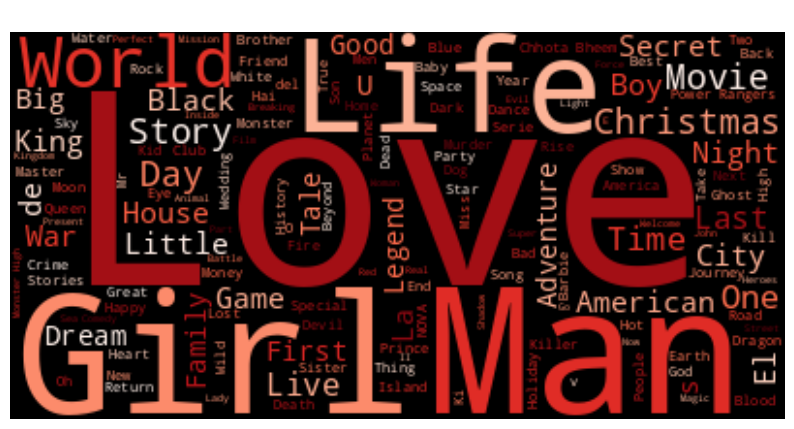

In [32]:
# Extract titles from the Netflix dataset
titles = data['title'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

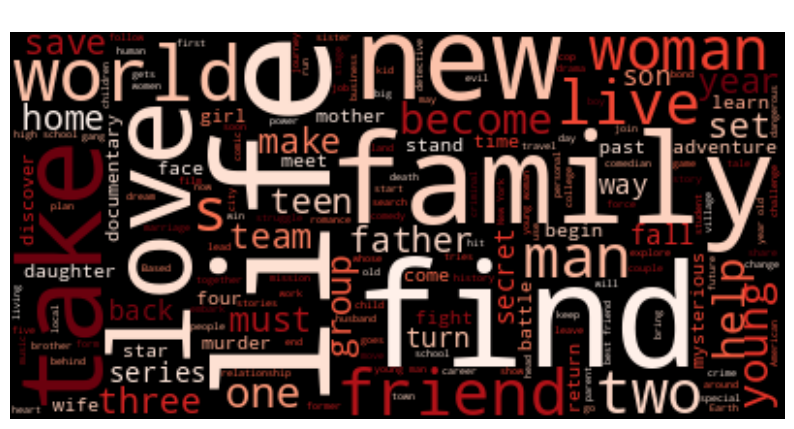

In [33]:
# Extract titles from the Netflix dataset
titles = data['description'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

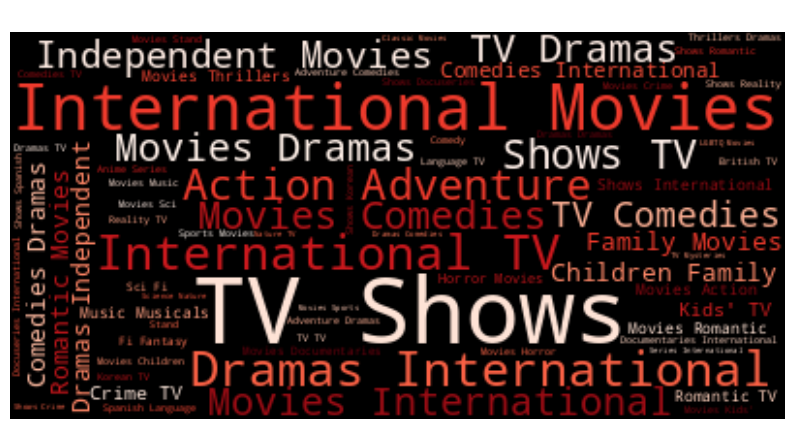

In [35]:
# Extract titles from the Netflix dataset
titles = data['listed_in'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

In [43]:
country_movie_counts = data['country'].value_counts()

# Create a DataFrame with country names and movie counts
data = pd.DataFrame({'country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

# Create the world map
fig = px.choropleth(data_frame=data, locations='country', locationmode='country names',
                    color='Movie Count', title='Number of Movies Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Movie Count'].max()),
                    labels={'Movie Count': 'Number of Movies'})

# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the plot area
    font_color='white'  # White font color
)
fig.show()